In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [83]:
from sklearn.model_selection import train_test_split

# critères de base
x = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary','market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online' ]]

# Critère à prédire
y = df['booking_status_Not_Canceled']

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline

# pas de données nulles

# Nettoyage des str:
    # Booking_ID
    # type_of_meal_plan
    # room_type_reserved
    # market_segment_type

    # booking_status

categorical_features = ['type_of_meal_plan','room_type_reserved', 'market_segment_type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'),
         categorical_features),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False, # optionnel, pour noms plus clairs
    force_int_remainder_cols=False # évite le warning
)

In [85]:
# splitter les données : 80% de training /20% de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
model = Pipeline(
    steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
    ]
)
model.fit(x_train, y_train)
# Retirer les colonnes textuelles inutiles
# df.drop(['Booking_ID'], axis=1, inplace=True)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type'])],
                                   verbose_feature_names_out=False)),
                ('classifier', DecisionTreeClassifier(max_depth=5))])

In [87]:
# Extract the trained decision tree model from the pipeline
trained_tree = model.named_steps['classifier']

In [88]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [89]:
predictions = model.predict(x_test)
print(predictions[:5])

['Not_Canceled' 'Not_Canceled' 'Canceled' 'Not_Canceled' 'Canceled']


In [90]:
from graph_utils import display_predict_diff_errors

# display_predict_diff_errors(y_test, predictions)

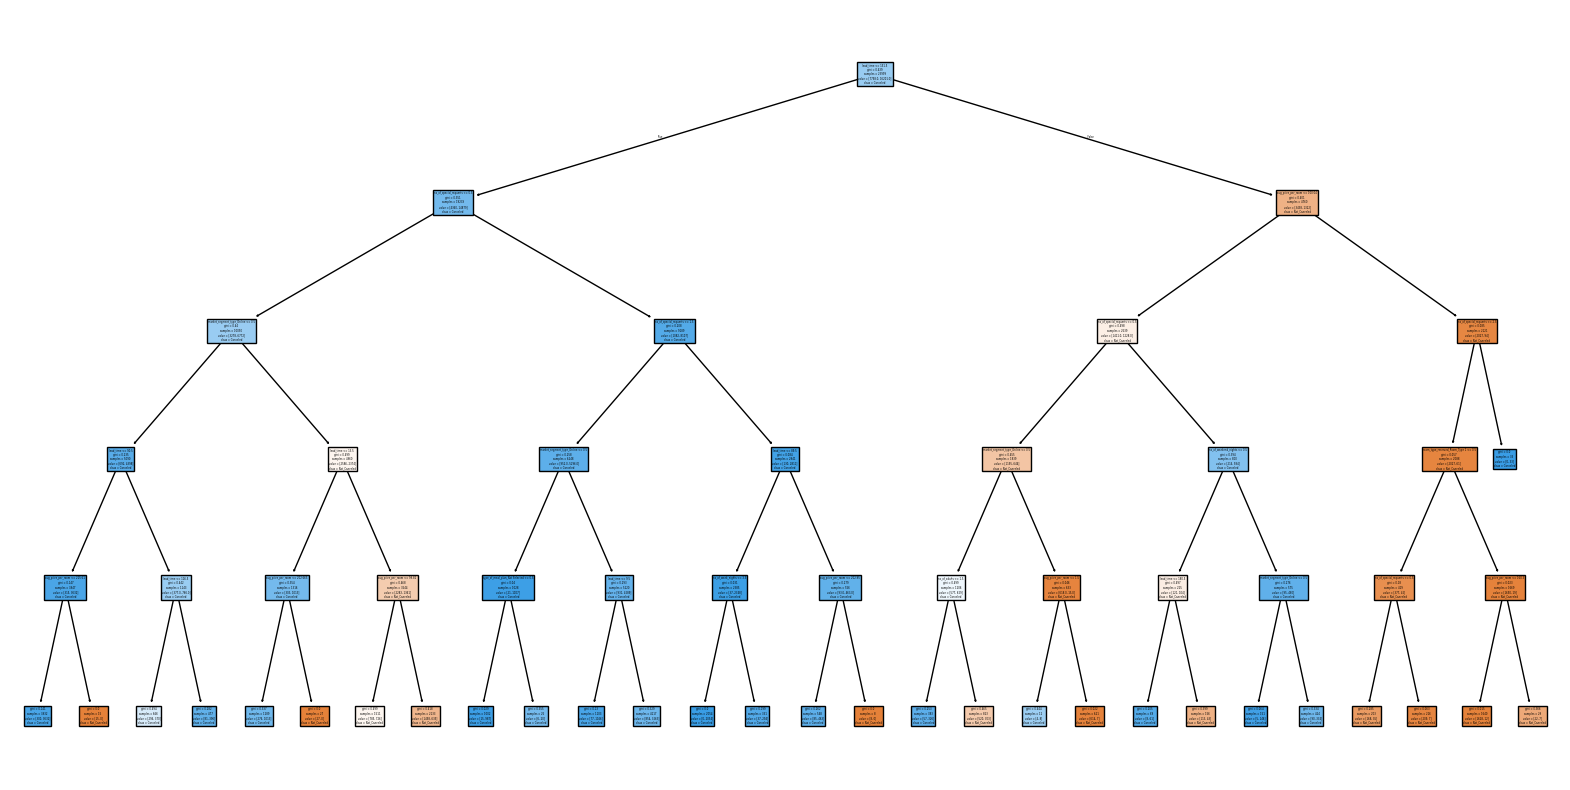

In [91]:
model.fit(x_train, y_train)
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
plt.figure(figsize=(20, 10))
plot_tree(trained_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=y_train.unique().astype(str))
plt.show()
